In [1]:
from Bio import Entrez

In [2]:
import pprint

In [3]:
import pandas as pd

In [4]:
def search(query):
    Entrez.email = 'sxxize@gmail.com'
    handle = Entrez.esearch(db='pubmed', 
                            sort='relevance', 
                            retmax='1000',
                            retmode='xml', 
                            term=query)
    results = Entrez.read(handle)
    return results

In [5]:
def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'sxxize@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results

In [6]:
results = search('nanoparticle')
id_list = results['IdList']
papers = fetch_details(id_list)
for i, paper in enumerate(papers['PubmedArticle']):
    print("%d) %s" % (i+1, paper['MedlineCitation']['Article']['ArticleTitle']))

1) Preferential binding of positive nanoparticles on cell membranes is due to electrostatic interactions: A too simplistic explanation that does not take into account the nanoparticle protein corona.
2) Magnetic nanoparticles to recover cellular organelles and study the time resolved nanoparticle-cell interactome throughout uptake.
3) Peritumoral implantation of hydrogel-containing nanoparticles and losartan for enhanced nanoparticle penetration and antitumor effect.
4) Monitoring of the Cytoskeleton-Dependent Intracellular Trafficking of Fluorescent Iron Oxide Nanoparticles by Nanoparticle Pulse-Chase Experiments in C6 Glioma Cells.
5) Nanoparticle Tracking Analysis for Determination of Hydrodynamic Diameter, Concentration, and Zeta-Potential of Polyplex Nanoparticles.
6) Electrochemiluminescence observing the surface features of Ru-doped silica nanoparticles based on nanoparticle-ultramicroelectrode collision.
7) Programmed Nanoparticle-Loaded Nanoparticles for Deep-Penetrating 3D Ca

In [7]:
papers.keys()

dict_keys(['PubmedBookArticle', 'PubmedArticle'])

In [8]:
papers['PubmedArticle'][0].keys()

dict_keys(['MedlineCitation', 'PubmedData'])

In [9]:
papers['PubmedArticle'][0]['MedlineCitation'].keys()

dict_keys(['KeywordList', 'GeneralNote', 'OtherID', 'OtherAbstract', 'SpaceFlightMission', 'CitationSubset', 'PMID', 'DateCompleted', 'DateRevised', 'Article', 'MedlineJournalInfo', 'ChemicalList', 'MeshHeadingList'])

In [10]:
#pprint.pprint(papers['PubmedArticle'][0]['MedlineCitation'])

# Key Word List

In [11]:
[str(i) for i in papers['PubmedArticle'][0]['MedlineCitation']['KeywordList'][0]]

['Cellular uptake',
 'Nanoparticle',
 'Nanoparticle/cell interaction',
 'Protein corona']

# Author List

In [12]:
papers['PubmedArticle'][0]['MedlineCitation']['Article'].keys()

dict_keys(['ArticleDate', 'Language', 'ELocationID', 'Journal', 'ArticleTitle', 'Pagination', 'Abstract', 'AuthorList', 'PublicationTypeList'])

In [13]:
papers['PubmedArticle'][1]['MedlineCitation']['Article']['AuthorList']

ListElement([DictElement({'Identifier': [], 'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Centre For BioNano Interactions (CBNI), School of Chemistry and Chemical Biology, University College Dublin, Belfield, Dublin 4, Ireland.'}], 'LastName': 'Bertoli', 'ForeName': 'Filippo', 'Initials': 'F'}, attributes={'ValidYN': 'Y'}), DictElement({'Identifier': [], 'AffiliationInfo': [], 'LastName': 'Davies', 'ForeName': 'Gemma-Louise', 'Initials': 'GL'}, attributes={'ValidYN': 'Y'}), DictElement({'Identifier': [], 'AffiliationInfo': [], 'LastName': 'Monopoli', 'ForeName': 'Marco P', 'Initials': 'MP'}, attributes={'ValidYN': 'Y'}), DictElement({'Identifier': [], 'AffiliationInfo': [], 'LastName': 'Moloney', 'ForeName': 'Micheal', 'Initials': 'M'}, attributes={'ValidYN': 'Y'}), DictElement({'Identifier': [], 'AffiliationInfo': [], 'LastName': "Gun'ko", 'ForeName': 'Yurii K', 'Initials': 'YK'}, attributes={'ValidYN': 'Y'}), DictElement({'Identifier': [], 'AffiliationInfo': [], 'LastName': 

In [14]:
paper_author_lst=[i['MedlineCitation']['Article']['AuthorList'] for i in papers['PubmedArticle']]

In [15]:
len(paper_author_lst)

1000

In [16]:
dfs=[pd.DataFrame(paper_author_lst[i]) for i in range(len(paper_author_lst))]

In [26]:
names_dfs=pd.concat(dfs, axis=0, sort=True )

In [28]:
names_dfs.head()

,AffiliationInfo,ForeName,Identifier,Initials,LastName,Suffix
0,"[{'Identifier': [], 'Affiliation': 'Ecole Nati...",Valérie,[],V,Forest,NaN
1,"[{'Identifier': [], 'Affiliation': 'Ecole Nati...",Jérémie,[],J,Pourchez,NaN
0,"[{'Identifier': [], 'Affiliation': 'Centre For...",Filippo,[],F,Bertoli,NaN
1,[],Gemma-Louise,[],GL,Davies,NaN
2,[],Marco P,[],MP,Monopoli,NaN


In [29]:
author_count_df=names_dfs[['ForeName', 'LastName']].groupby(['ForeName', 'LastName']).size().reset_index(name='count').sort_values(by='count', ascending=False)

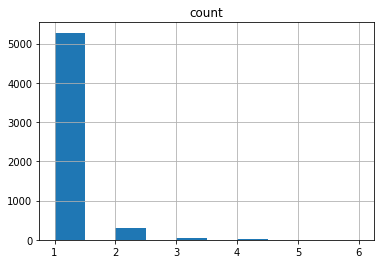

In [30]:
author_count_df.hist();

# Top Authors

In [62]:
top=author_count_df.head(10)

In [63]:
top

,ForeName,LastName,count
867,Conxita,Solans,6
4943,Warren C W,Chan,6
998,David Julian,McClements,5
3542,Nikhil R,Jana,5
48,Achim,Aigner,5
2538,Kenneth A,Dawson,4
1879,Issei,Takeuchi,4
2328,Juan M,Irache,4
835,Chunying,Chen,4
5014,Willem J M,Mulder,4


In [64]:
google_url='https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q='

In [65]:
name=top['ForeName']+' '+top['LastName']

In [88]:
result=top.reset_index(drop=True).join(pd.DataFrame({'Google Scholar':[google_url+i for i in name.str.replace(' ', '+')+'+review&oq=']}))

In [86]:
pd.set_option('display.max_colwidth', 1000)

In [89]:
result

,ForeName,LastName,count,Google Scholar
0,Conxita,Solans,6,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Conxita+Solans+review&oq=
1,Warren C W,Chan,6,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Warren+C+W+Chan+review&oq=
2,David Julian,McClements,5,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=David+Julian+McClements+review&oq=
3,Nikhil R,Jana,5,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Nikhil+R+Jana+review&oq=
4,Achim,Aigner,5,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Achim+Aigner+review&oq=
5,Kenneth A,Dawson,4,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Kenneth+A+Dawson+review&oq=
6,Issei,Takeuchi,4,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Issei+Takeuchi+review&oq=
7,Juan M,Irache,4,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Juan+M+Irache+review&oq=
8,Chunying,Chen,4,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Chunying+Chen+review&oq=
9,Willem J M,Mulder,4,https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Willem+J+M+Mulder+review&oq=


In [90]:
print(pd.DataFrame({'Google Scholar':[google_url+i for i in name.str.replace(' ', '+')+'+review&oq=']}))

                                                                                 Google Scholar
0           https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Conxita+Solans+review&oq=
1          https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Warren+C+W+Chan+review&oq=
2  https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=David+Julian+McClements+review&oq=
3            https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Nikhil+R+Jana+review&oq=
4             https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Achim+Aigner+review&oq=
5         https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Kenneth+A+Dawson+review&oq=
6           https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Issei+Takeuchi+review&oq=
7            https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Juan+M+Irache+review&oq=
8            https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=Chunying+Chen+review&oq=
9        https://scholar.google.co.kr/sc

# Key Words from Title

In [110]:
titles=[i['MedlineCitation']['Article']['ArticleTitle'].replace(',','').replace('.','').replace(':', '').replace('?','').replace('<sub>', '').replace('</sub>','').replace('<i>','').replace('</i>','') for i in papers['PubmedArticle']]

In [111]:
titles

['Preferential binding of positive nanoparticles on cell membranes is due to electrostatic interactions A too simplistic explanation that does not take into account the nanoparticle protein corona',
 'Magnetic nanoparticles to recover cellular organelles and study the time resolved nanoparticle-cell interactome throughout uptake',
 'Peritumoral implantation of hydrogel-containing nanoparticles and losartan for enhanced nanoparticle penetration and antitumor effect',
 'Monitoring of the Cytoskeleton-Dependent Intracellular Trafficking of Fluorescent Iron Oxide Nanoparticles by Nanoparticle Pulse-Chase Experiments in C6 Glioma Cells',
 'Nanoparticle Tracking Analysis for Determination of Hydrodynamic Diameter Concentration and Zeta-Potential of Polyplex Nanoparticles',
 'Electrochemiluminescence observing the surface features of Ru-doped silica nanoparticles based on nanoparticle-ultramicroelectrode collision',
 'Programmed Nanoparticle-Loaded Nanoparticles for Deep-Penetrating 3D Cancer

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
tfidf=TfidfVectorizer(stop_words='english')

In [119]:
tfidf.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [114]:
X=tfidf.fit_transform(titles)

In [115]:
tfidf.get_feature_names()

['001l',
 '10',
 '1000',
 '10a',
 '111',
 '14',
 '15',
 '1β',
 '2002',
 '21',
 '221',
 '231',
 '25',
 '26',
 '2d',
 '30',
 '3d',
 '40',
 '407',
 '64',
 '68',
 '780',
 'a549',
 'ability',
 'ablation',
 'ablative',
 'abnormalities',
 'abrogates',
 'absence',
 'absorption',
 'account',
 'accumulation',
 'acetate',
 'achieve',
 'achieved',
 'achievements',
 'achieving',
 'acid',
 'acidic',
 'acidity',
 'acids',
 'acoustic',
 'acquisition',
 'acrylic',
 'acrylonitrile',
 'acting',
 'action',
 'activatable',
 'activated',
 'activating',
 'activation',
 'active',
 'activities',
 'activity',
 'actual',
 'acute',
 'adding',
 'addition',
 'address',
 'adherent',
 'adhesion',
 'adhesive',
 'adhesives',
 'adjacent',
 'adjusting',
 'adjuvant',
 'adjuvants',
 'administration',
 'adopted',
 'adsorption',
 'adsorptive',
 'advance',
 'advanced',
 'advancements',
 'advances',
 'advantages',
 'aerodynamically',
 'aerogel',
 'aeroneb',
 'aerosol',
 'aerosols',
 'aeruginosa',
 'aestivum',
 'af',
 'affect',

In [108]:
X.shape

(1000, 3108)

In [117]:
print(X)

  (0, 2278)	0.31493141443044825
  (0, 327)	0.2508229696271213
  (0, 2258)	0.2757485758948218
  (0, 1898)	0.07351883810329334
  (0, 489)	0.16485918540767527
  (0, 1703)	0.2641266739340356
  (0, 959)	0.3336819325251974
  (0, 1474)	0.19875117815389626
  (0, 2623)	0.3336819325251974
  (0, 1073)	0.3336819325251974
  (0, 891)	0.31493141443044825
  (0, 30)	0.3336819325251974
  (0, 1897)	0.06550597958578447
  (0, 2334)	0.1779631292843238
  (0, 682)	0.19875117815389626
  (1, 1898)	0.08878499824882304
  (1, 489)	0.19909213563954792
  (1, 1897)	0.07910827255784367
  (1, 1652)	0.24641127642740634
  (1, 2417)	0.40297086514464947
  (1, 492)	0.2431252042740543
  (1, 2019)	0.40297086514464947
  (1, 2753)	0.2597258441977248
  (1, 2884)	0.29429739786881787
  (1, 2473)	0.3642605950530498
  :	:
  (998, 1652)	0.19717657401680755
  (998, 1005)	0.176003876578388
  (998, 1192)	0.21737509731026686
  (998, 1374)	0.18043209733188167
  (998, 2834)	0.18639941086202286
  (998, 1764)	0.22952739878644493
  (998, 2474

In [130]:
tfidf.vocabulary_

{'preferential': 2278,
 'binding': 327,
 'positive': 2258,
 'nanoparticles': 1898,
 'cell': 489,
 'membranes': 1703,
 'electrostatic': 959,
 'interactions': 1474,
 'simplistic': 2623,
 'explanation': 1073,
 'does': 891,
 'account': 30,
 'nanoparticle': 1897,
 'protein': 2334,
 'corona': 682,
 'magnetic': 1652,
 'recover': 2417,
 'cellular': 492,
 'organelles': 2019,
 'study': 2753,
 'time': 2884,
 'resolved': 2473,
 'interactome': 1475,
 'uptake': 2998,
 'peritumoral': 2115,
 'implantation': 1397,
 'hydrogel': 1346,
 'containing': 654,
 'losartan': 1625,
 'enhanced': 1005,
 'penetration': 2102,
 'antitumor': 200,
 'effect': 940,
 'monitoring': 1821,
 'cytoskeleton': 750,
 'dependent': 793,
 'intracellular': 1491,
 'trafficking': 2918,
 'fluorescent': 1146,
 'iron': 1517,
 'oxide': 2046,
 'pulse': 2349,
 'chase': 516,
 'experiments': 1072,
 'c6': 414,
 'glioma': 1230,
 'cells': 491,
 'tracking': 2915,
 'analysis': 156,
 'determination': 813,
 'hydrodynamic': 1345,
 'diameter': 830,
 'co

In [135]:
X.todense()[:,2278]

matrix([[0.31493141],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0